# Diabetes Prediction

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [85]:
df = pd.read_csv(r"diabetes.csv")

In [97]:
display(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [98]:
"""
Pregnancies: number of pregnancies
Glucose: glucose level in blood
BloodPressure: blood pressure measurement
SkinThickness: thickness of the skin
Insulin: insulin level in blood
BMI: body mass index
DiabetesPedigreeFunction: express the dianbetes percentage
Age: age
Outcome: 0 - no diabetes, 1 - diabetes
"""

'\nPregnancies: number of pregnancies\nGlucose: glucose level in blood\nBloodPressure: blood pressure measurement\nSkinThickness: thickness of the skin\nInsulin: insulin level in blood\nBMI: body mass index\nDiabetesPedigreeFunction: express the dianbetes percentage\nAge: age\nOutcome: 0 - no diabetes, 1 - diabetes\n'

### Checking for null values, duplicates and data type

In [87]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [100]:
df.duplicated().value_counts()

False    768
dtype: int64

In [89]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
""" 
There are no null values or duplicated rows in the dataset. Assuming for this case that the dataset was correctly
filled, in order to simplify the exemple, there will be no preprocessing analyses for the data. 
"""

### Separating train and test variables

In [90]:
x = df.drop('Outcome', axis=1)
y = df.Outcome

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [ ]:
"""
The test_size parameter defines the percentege of the dataset that will be used for teste after the learning
process. In this case, 20%. The random_state parameter is optional and it ensures that the same data is being 
used when the train_test_split is applied, no matter how many times you run the code. It is an easy way guarantee
that anyone will obtain the same result when running this code woth the set parameters.
"""

### Scale data

In [91]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
"""
Use the standardization in order to set all the data in the same scale. That will prevent some inconsistencies in
the results.
"""

### Training model

In [92]:
lr = LogisticRegression(solver='liblinear', C=0.5, max_iter=1000, random_state=0)
lr.fit(x_train, y_train)

LogisticRegression(C=0.5, max_iter=1000, random_state=0, solver='liblinear')

In [ ]:
"""
The solver parameter defines the algorithm used for the optimization problem. The 'liblinear' type is indicated for
small datasets, whitch is the case. The C parameter is the inverse of regularization strength. Smaller values specify 
stronger regularization.
"""

### Predicting results

In [93]:
y_pred = lr.predict(x_test)

### Evaluating model

Text(0.5, 1.0, 'Confusion Matrix')

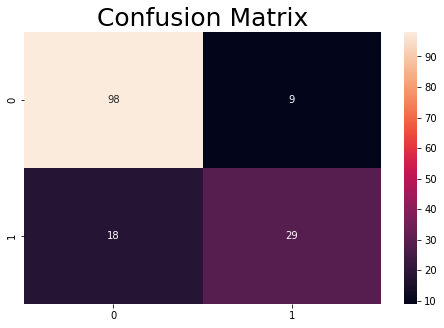

In [95]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix', fontsize=25)

In [96]:
print(classification_report(y_test, y_pred, target_names=['no diabetes', 'diabetes']))

              precision    recall  f1-score   support

 no diabetes       0.84      0.92      0.88       107
    diabetes       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [ ]:
"""
The confusion matrix is a visual method used for better understanding the way the program was rigth or wrong with the
predictions. The collumns axis is the dataset values used for the test. And the row axis is the predicted for the program.
It has four quadrants described bellow:
True negatives - correctly predicted negatives (zeros). In our case, 98.
True positives - correctly predicted positives (ones). In our case, 29.
False negatives - incorrectly predicted negatives (zeros). In our case, 18.
False positives - incorrectly predicted positives (ones). In our case, 9.
The classification report gives a more detailed report of the tests. An important information showed is the accuracy,
whitch was 82%. Another one is the precison, whitch indicates that the program was right at 84% of the time in its 
no diabetes predictions and 76% right in its diabetes predictions. 

"""